# MNIST 1: Erkennung von handgeschriebenen Ziffern

Eines der bekanntesten Beispiel für die Anwenung neuronaler Netzwerke ist die Erkennung handgeschriebener Ziffern. Diese Aufgabe ergibt sich etwa bei der Verarbeitung von Postleitzahlen durch automatisierte Probleme.

Es zeigt sich, dass diese Aufgabe durch konventionelle Programmierung nur schwer umzusetzen ist. Dabei ist die Aufgabe auch für ein Kind leicht zu lösen, das bereits Zahlen lesen kann.

Liegen genügend Daten vor, d.h. eingescannte handgeschriebene Ziffern, so lässt sich ein einfaches neuronales Netz leicht und schnell trainieren, so dass das trainierte Netz in der Lage ist, mit hoher Zuverlässigkeit Ziffern zu erkennen.

## Die Daten: Die MNIST-Datenbank

Jeder, der sich mit maschinellem Lernen beschäftigt, wird irgendwann einmal mit der MNIST-Datenbank zu tun haben. 

> Die **MNIST-Datenbank** (Modified National Institute of Standards and Technology database) ist eine öffentlich verfügbare Datenbank von handgeschriebenen Ziffern. Wobei jede Ziffer als 28 × 28 Pixel großes Graustufen-Bild gespeichert ist. Die MNIST-Datenbank besteht aus **60.000 Beispielen im Trainingsdatensatz** und **10.000 Beispielen im Testdatensatz**. Der Datensatz dient dem Trainieren von Klassifikatoren, unter anderem Convolutional Neural Networks, im weiteren Sinne dem Maschinellen Lernen bzw. der Künstlichen Intelligenz. \[...\]
François Chollet, einer der Keras-Hauptentwickler sieht MNIST nicht mehr als relevanten Benchmark an, allerdings wird die MNIST-Datenbank gerne als Einsteigerbeispiel für maschinelles Lernen verwendet. (Aus der deutschen Wikipedia)

Man findet die Daten im Web z.B. unter https://pjreddie.com/media/files/mnist_train.csv,  https://pjreddie.com/media/files/mnist_test.csv

Mit der folgenden Funktion können die beiden Datensätze direkt in unser Unterverzeichnis _daten_ heruntergeladen werden (dazu _load_mnist()_ ausführen):

In [1]:
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def load_mnist():
    url = "https://pjreddie.com/media/files/"
    for name in ["mnist_train.csv","mnist_test.csv"]:
        with urllib.request.urlopen(url + name) as f:
            data = f.read().decode('utf-8')
            with open(name, "w") as file:
               file.write(data)

#load_mnist()    

### Ein Wrapper für den MNIST-Datensatz

Zum einfacheren Zugriff auf die MNIST-Daten definieren wir ein Wrapper-Objekt. Die MNIST-Daten liegen in in einer kommaseparierten Tabelle mit 60.000 bzw. 10.000 Zeilen für die Trainings- bzw. Testdaten vor, wobei jede Zeile aus 785 Werten besteht; der erste Wert gibt die Ziffer an und die übrigen 28x28=784 Werte die Bytemap der Ziffer. Die Zeilen sind (vor-)gemischt.

#### Die Klasse MnistDataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
class MnistDataset:    
    """
    Wrapper-Klasse für den MNIST-Datensatz.
    """
    def __init__(self,csv_file):  
        with open(csv_file, "r") as file: 
            self.data = [line.split(',') for line in file.readlines()]   
        pass
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        """
        Liefert den Eintrag mit dem angegebenen Index.
        """        
        return self.data[row]

    def get_record(self,row):
        return self.get[row]
    
    def values(self):     
        """
        Liefert die Rohdaten, also N Zeilen mit 785 Werten
        """
        return self.data

    def X(self):     
        """
        Liefert die Rohdaten, also N Zeilen mit 785 Werten
        """
        return self.data[1:] 

    def y(self):     
        """
        Liefert die Rohdaten, also N Zeilen mit 785 Werten
        """
        return self.data[0]    
    
    def plot(self,index):
        """
        Plottet den Eintrag mit dem angegebenen Index.
        """
        row = self.data[index]
        label = row[0]
        img = np.reshape(row[1:],(28,28)).astype(float)
        self.show_axes(False)
        plt.title(f'Number = {label}')
        plt.imshow(img,cmap='Blues')  
        plt.show()
        pass
    
    def plot_list(self,rows,cols,offset = 0):
        """
        Plottet den Eintrag mit dem angegebenen Index.
        """
        for r in range(rows):
            for c in range(cols):
                plt.subplot(rows,cols,r*cols + c +1)
                self.show_axes(False)
                row = self.data[r*rows + c + offset]
                label = row[0]
                img = np.reshape(row[1:],(28,28)).astype(float)
                #plt.title(label)                
                plt.imshow(img,cmap='Blues')
        pass
        
    def show_axes(self,flag):
        ''' Schaltet die Anzeige der Achsenbeschriftung ein oder aus '''
        ax = plt.gca()
        ax.axes.xaxis.set_visible(flag)
        ax.axes.yaxis.set_visible(flag)
        pass
        

### Einlesen der Trainings- und Testdaten

In [4]:
mnist_test  = MnistDataset('mnist_test.csv')
mnist_train = MnistDataset('mnist_train.csv')

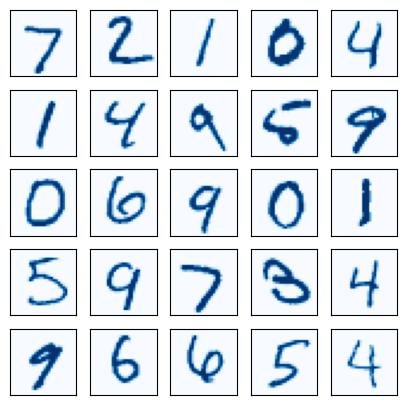

In [5]:
fig = plt.figure(figsize=(5,5))

mnist_test.plot_list(5,5)
plt.show()        

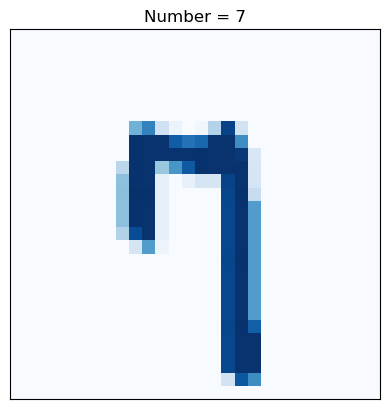

In [6]:
mnist_test.plot(80)

### Anmerkung

Das Einlesen und die Verarbeitung von Daten geht sehr einfach mit der **Pandas**-Bibliothek von Python, auf die wir hier aber bewusst verzichten. NumPy, Pandas und Matplotlib sind die drei grundlegenden Bibliotheken, die in fast jedem einfachen Python-Programm im Bereich Data Science zum Einsatz kommen.